## ANÁLISIS EXPLORATORIO DEL FLUJO VEHICULAR EN CABA
- A través de un dataset de la ciudad de Buenos Aires, haremos un breve análisis el cual nos permitirá saber que locación es la mas concurrida y en que horario.
- Link al dataset https://data.buenosaires.gob.ar/dataset/flujo-vehicular-anillo-digital fecha de descarga (1-1-2020)

In [1]:
# Importamos las bibliotecas a utilizar.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from pandasql import sqldf

In [2]:
# Importamos nuestro dataset.
df=pd.read_excel(r"C:\Users\tobi_\OneDrive\Escritorio\PROYECTOS\FLUJO VEHICULAR\dataset_flujo_vehicular.xlsx")

### Exploración analítica del dataset
- Para saber que dataset nos encontramos, utilizaremos distintas medidas las cuales nos ayudarán a poder manejarlo de mejor forma.

In [3]:
# Conocemos los primeros datos del set.
df.head()

,CODIGO_LOCACION,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD
0,48Q3CJ00+,2020-03-31 15:00:00,729,Interna,-34.588796,-58.381520
1,48Q3CJ00+,2020-03-31 15:00:00,447,Egreso,-34.588796,-58.381520
2,48Q39G00+,2020-03-31 15:00:00,175,Interna,-34.633299,-58.468594
3,48Q39G00+,2020-03-31 15:00:00,1186,Egreso,-34.633299,-58.468594
4,48Q3CH00+,2020-03-31 15:00:00,35,Egreso,-34.579632,-58.427733


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172025 entries, 0 to 172024
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CODIGO_LOCACION  172025 non-null  object        
 1   HORA             172025 non-null  datetime64[ns]
 2   CANTIDAD         172025 non-null  int64         
 3   SENTIDO          172025 non-null  object        
 4   LATITUD          169429 non-null  float64       
 5   LONGITUD         169429 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 7.9+ MB


In [5]:
# Eliminamos los valores nulos ya que 
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169429 entries, 0 to 172024
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CODIGO_LOCACION  169429 non-null  object        
 1   HORA             169429 non-null  datetime64[ns]
 2   CANTIDAD         169429 non-null  int64         
 3   SENTIDO          169429 non-null  object        
 4   LATITUD          169429 non-null  float64       
 5   LONGITUD         169429 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 9.0+ MB


In [6]:
# Buscamos las medidas principales de la columna "Cantidad"
df["CANTIDAD"].describe()

count    169429.000000
mean       2112.265232
std        2393.726980
min           1.000000
25%         418.000000
50%        1168.000000
75%        3063.000000
max      179340.000000
Name: CANTIDAD, dtype: float64

In [7]:
# Buscamos las "etiquetas únicas" de las variables categóricas
print(df["SENTIDO"].unique())
print(df["CODIGO_LOCACION"].unique())

['Interna' 'Egreso' 'Ingreso']
['48Q3CJ00+' '48Q39G00+' '48Q3CH00+' '48Q39J00+' '48Q3FG00+' '48Q39H00+']


In [8]:
# Buscamos la repetición de cada una de las variables
df["CODIGO_LOCACION"].value_counts()

48Q3CJ00+    47928
48Q39G00+    45760
48Q3CH00+    29865
48Q39H00+    16066
48Q39J00+    15916
48Q3FG00+    13894
Name: CODIGO_LOCACION, dtype: int64

### DATA WRANGLING
- Haremos un pequeño data wrangling para poder graficar de forma mas sencilla.
- Para realizar las modificaciones, usaremos un sqlpandas que permitirá utilizar la sintaxis de SQL.

In [9]:
# Creamos dos nuevos columnas dividiendo así la fecha del horario para posteriores análisis
df['Dates'] = pd.to_datetime(df['HORA']).dt.date
df['Time'] = pd.to_datetime(df['HORA']).dt.time
df

,CODIGO_LOCACION,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD,Dates,Time
0,48Q3CJ00+,2020-03-31 15:00:00,729,Interna,-34.588796,-58.381520,2020-03-31,15:00:00
1,48Q3CJ00+,2020-03-31 15:00:00,447,Egreso,-34.588796,-58.381520,2020-03-31,15:00:00
2,48Q39G00+,2020-03-31 15:00:00,175,Interna,-34.633299,-58.468594,2020-03-31,15:00:00
3,48Q39G00+,2020-03-31 15:00:00,1186,Egreso,-34.633299,-58.468594,2020-03-31,15:00:00
4,48Q3CH00+,2020-03-31 15:00:00,35,Egreso,-34.579632,-58.427733,2020-03-31,15:00:00
...,...,...,...,...,...,...,...,...
172020,48Q39J00+,2021-12-24 19:00:00,624,Interna,-34.608550,-58.372951,2021-12-24,19:00:00
172021,48Q39J00+,2021-12-24 20:00:00,500,Interna,-34.608550,-58.372951,2021-12-24,20:00:00
172022,48Q3CH00+,2021-12-23 21:00:00,666,Egreso,-34.579632,-58.427733,2021-12-23,21:00:00
172023,48Q3CH00+,2021-12-23 21:00:00,1052,Interna,-34.579632,-58.427733,2021-12-23,21:00:00


In [10]:
# Utilizamos una "query" de sql para crear nuevos dataframes los cuales tengan la cantidad de total de:
# "Ingreso","Egreso", "Interno".
primero=sqldf("""SELECT CODIGO_LOCACION, COUNT(SENTIDO)*CANTIDAD,SENTIDO 
FROM df 
WHERE CODIGO_LOCACION="48Q3CJ00+" AND SENTIDO="Interna" OR SENTIDO="Egreso" OR SENTIDO="Ingreso"
GROUP BY SENTIDO""")
segundo=sqldf("""SELECT CODIGO_LOCACION, COUNT(SENTIDO)*CANTIDAD,SENTIDO 
FROM df 
WHERE CODIGO_LOCACION='48Q39G00+' AND SENTIDO="Interna" OR SENTIDO="Egreso" OR SENTIDO="Ingreso"
GROUP BY SENTIDO""")
tercero=sqldf("""SELECT CODIGO_LOCACION, COUNT(SENTIDO)*CANTIDAD,SENTIDO 
FROM df 
WHERE CODIGO_LOCACION='48Q3CH00+' AND SENTIDO="Interna" OR SENTIDO="Egreso" OR SENTIDO="Ingreso"
GROUP BY SENTIDO""")
cuarto=sqldf("""SELECT CODIGO_LOCACION, COUNT(SENTIDO)*CANTIDAD,SENTIDO 
FROM df 
WHERE CODIGO_LOCACION='48Q39J00+' AND SENTIDO="Interna" OR SENTIDO="Egreso" OR SENTIDO="Ingreso"
GROUP BY SENTIDO""")
quinto=sqldf("""SELECT CODIGO_LOCACION, COUNT(SENTIDO)*CANTIDAD,SENTIDO 
FROM df 
WHERE CODIGO_LOCACION='48Q3FG00+' AND SENTIDO="Interna" OR SENTIDO="Egreso" OR SENTIDO="Ingreso"
GROUP BY SENTIDO""")
sexto=sqldf("""SELECT CODIGO_LOCACION, COUNT(SENTIDO)*CANTIDAD,SENTIDO 
FROM df 
WHERE CODIGO_LOCACION='48Q39H00+' AND SENTIDO="Interna" OR SENTIDO="Egreso" OR SENTIDO="Ingreso"
GROUP BY SENTIDO""")

In [11]:
# Para luego poder graficarlo, pasaremos la columna de valores de interes a numpy.
primero1=primero["COUNT(SENTIDO)*CANTIDAD"].to_numpy()
segundo1=segundo["COUNT(SENTIDO)*CANTIDAD"].to_numpy()
tercero1=tercero["COUNT(SENTIDO)*CANTIDAD"].to_numpy()
cuarto1=cuarto["COUNT(SENTIDO)*CANTIDAD"].to_numpy()
quinto1=quinto["COUNT(SENTIDO)*CANTIDAD"].to_numpy()
sexto1=sexto["COUNT(SENTIDO)*CANTIDAD"].to_numpy()
lista1=[primero1,segundo1,tercero1,cuarto1,quinto1,sexto1]
# A su vez, ya creamos la etiqueta para el gráfico.
labels=sexto["SENTIDO"].unique()
labels


array(['Egreso', 'Ingreso', 'Interna'], dtype=object)

In [12]:
# Etiquetas de locaciones para usar para el grafico posterior.
locaciones=df["CODIGO_LOCACION"].unique()
locaciones

array(['48Q3CJ00+', '48Q39G00+', '48Q3CH00+', '48Q39J00+', '48Q3FG00+',
       '48Q39H00+'], dtype=object)

In [13]:
# Utilizamos una "query" de sql para crear nuevos dataframes los cuales tengan la cantidad de total de flujo en cada hora. 
time1=sqldf("""SELECT CODIGO_LOCACION,COUNT(TIME)*CANTIDAD,TIME
FROM df
WHERE CODIGO_LOCACION="48Q3CJ00+"
GROUP BY CODIGO_LOCACION,TIME
""")
time2=sqldf("""SELECT CODIGO_LOCACION,COUNT(TIME)*CANTIDAD,TIME
FROM df
WHERE CODIGO_LOCACION="48Q39G00+"
GROUP BY CODIGO_LOCACION,TIME
""")
time3=sqldf("""SELECT CODIGO_LOCACION,COUNT(TIME)*CANTIDAD,TIME
FROM df
WHERE CODIGO_LOCACION="48Q3CH00+"
GROUP BY CODIGO_LOCACION,TIME
""")
time4=sqldf("""SELECT CODIGO_LOCACION,COUNT(TIME)*CANTIDAD,TIME
FROM df
WHERE CODIGO_LOCACION="48Q39J00+"
GROUP BY CODIGO_LOCACION,TIME
""")
time5=sqldf("""SELECT CODIGO_LOCACION,COUNT(TIME)*CANTIDAD,TIME
FROM df
WHERE CODIGO_LOCACION="48Q3FG00+"
GROUP BY CODIGO_LOCACION,TIME
""")
time6=sqldf("""SELECT CODIGO_LOCACION,COUNT(TIME)*CANTIDAD,TIME
FROM df
WHERE CODIGO_LOCACION="48Q39H00+"
GROUP BY CODIGO_LOCACION,TIME
""")

In [14]:
# Generamos un índice para el gráfico
indice=time1["Time"].str.split(":",expand=True)
indice=indice[0]
# Convertimos a numpy los textos y los colocamos en una lista. 
cant1=time1["COUNT(TIME)*CANTIDAD"].to_numpy()
cant2=time2["COUNT(TIME)*CANTIDAD"].to_numpy()
cant3=time3["COUNT(TIME)*CANTIDAD"].to_numpy()
cant4=time4["COUNT(TIME)*CANTIDAD"].to_numpy()
cant5=time5["COUNT(TIME)*CANTIDAD"].to_numpy()
cant6=time6["COUNT(TIME)*CANTIDAD"].to_numpy()
times=[cant1,cant2,cant3,cant4,cant5,cant6]

In [15]:
# Agrupamos un nuevo dataset para saber las cantidad de flujo vehicular de cada locación.
cantidad=df.groupby(df["CODIGO_LOCACION"]).sum()
number_column = cantidad.loc[:,'CANTIDAD']
numbers = number_column.values
# y_pos=np.arange(len(locaciones))

In [16]:
# Calculamos la cantidad total flujo vehicular
cantidad["CANTIDAD"].sum()

357878986

In [17]:
# Calculamos el procentaje total
cant_total_porcentaje=cantidad["CANTIDAD"]/357878986*100

### Anális de gráficos

Text(0.5, 1.0, 'Locaciones mas transitadas')

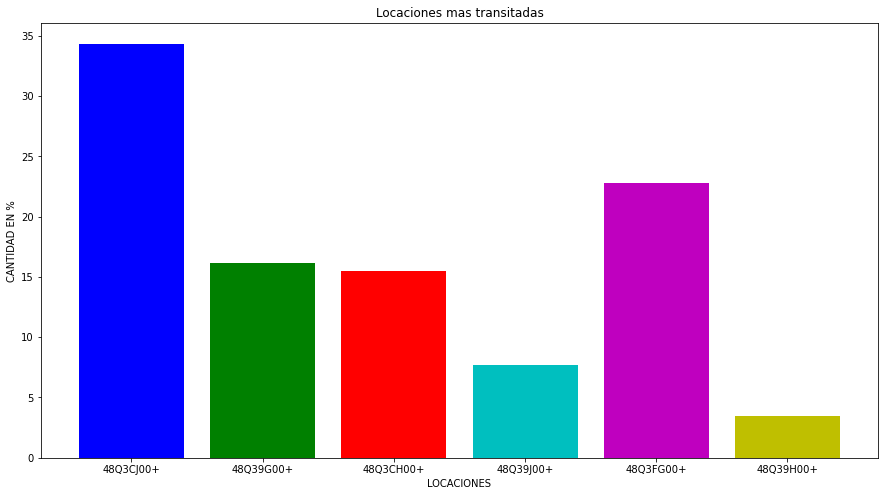

In [18]:
# El primer gráfico nos ayudará a visualizar cual es la locación mas transitada de todas.
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(locaciones,
       cant_total_porcentaje,
       color=("b","g","r","c","m","y"))
plt.xlabel("LOCACIONES")
plt.ylabel("CANTIDAD EN %")
ax.set_title("Locaciones mas transitadas")
# Podemos ver que por amplia diferencia "48Q3CJ00+" es la mas transitada.

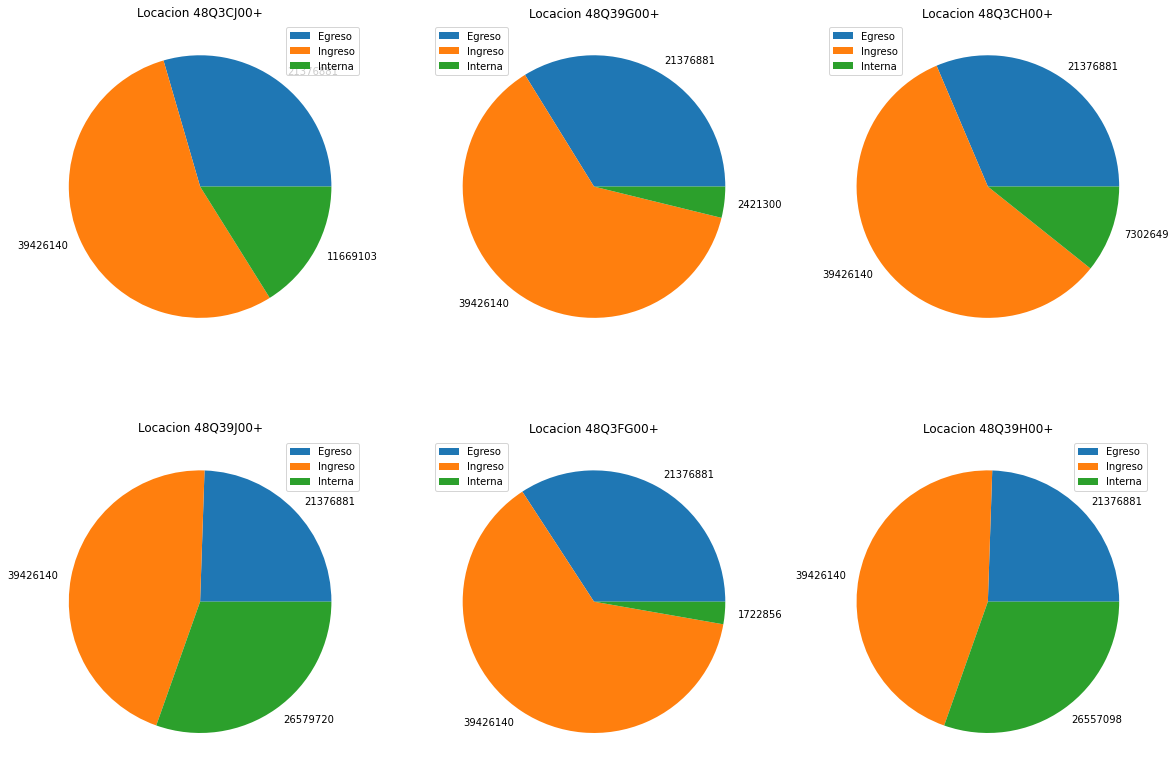

In [19]:
# El segundo gráfico buscará explicar el "motivo" de dichos flujos vehiculares.
columns=3
fig, ax = plt.subplots(figsize=(20,14),
                       nrows=2,
                       ncols=3)
for indx,var in enumerate(lista1):
    i=indx//columns
    j=indx%columns
    ax[i, j].pie(var,
                 labels=var)
    ax[i, j].legend(labels)
for indx,var in enumerate(locaciones):
    i=indx//columns
    j=indx%columns
    ax[i, j].set_title("Locacion {}".format(var))

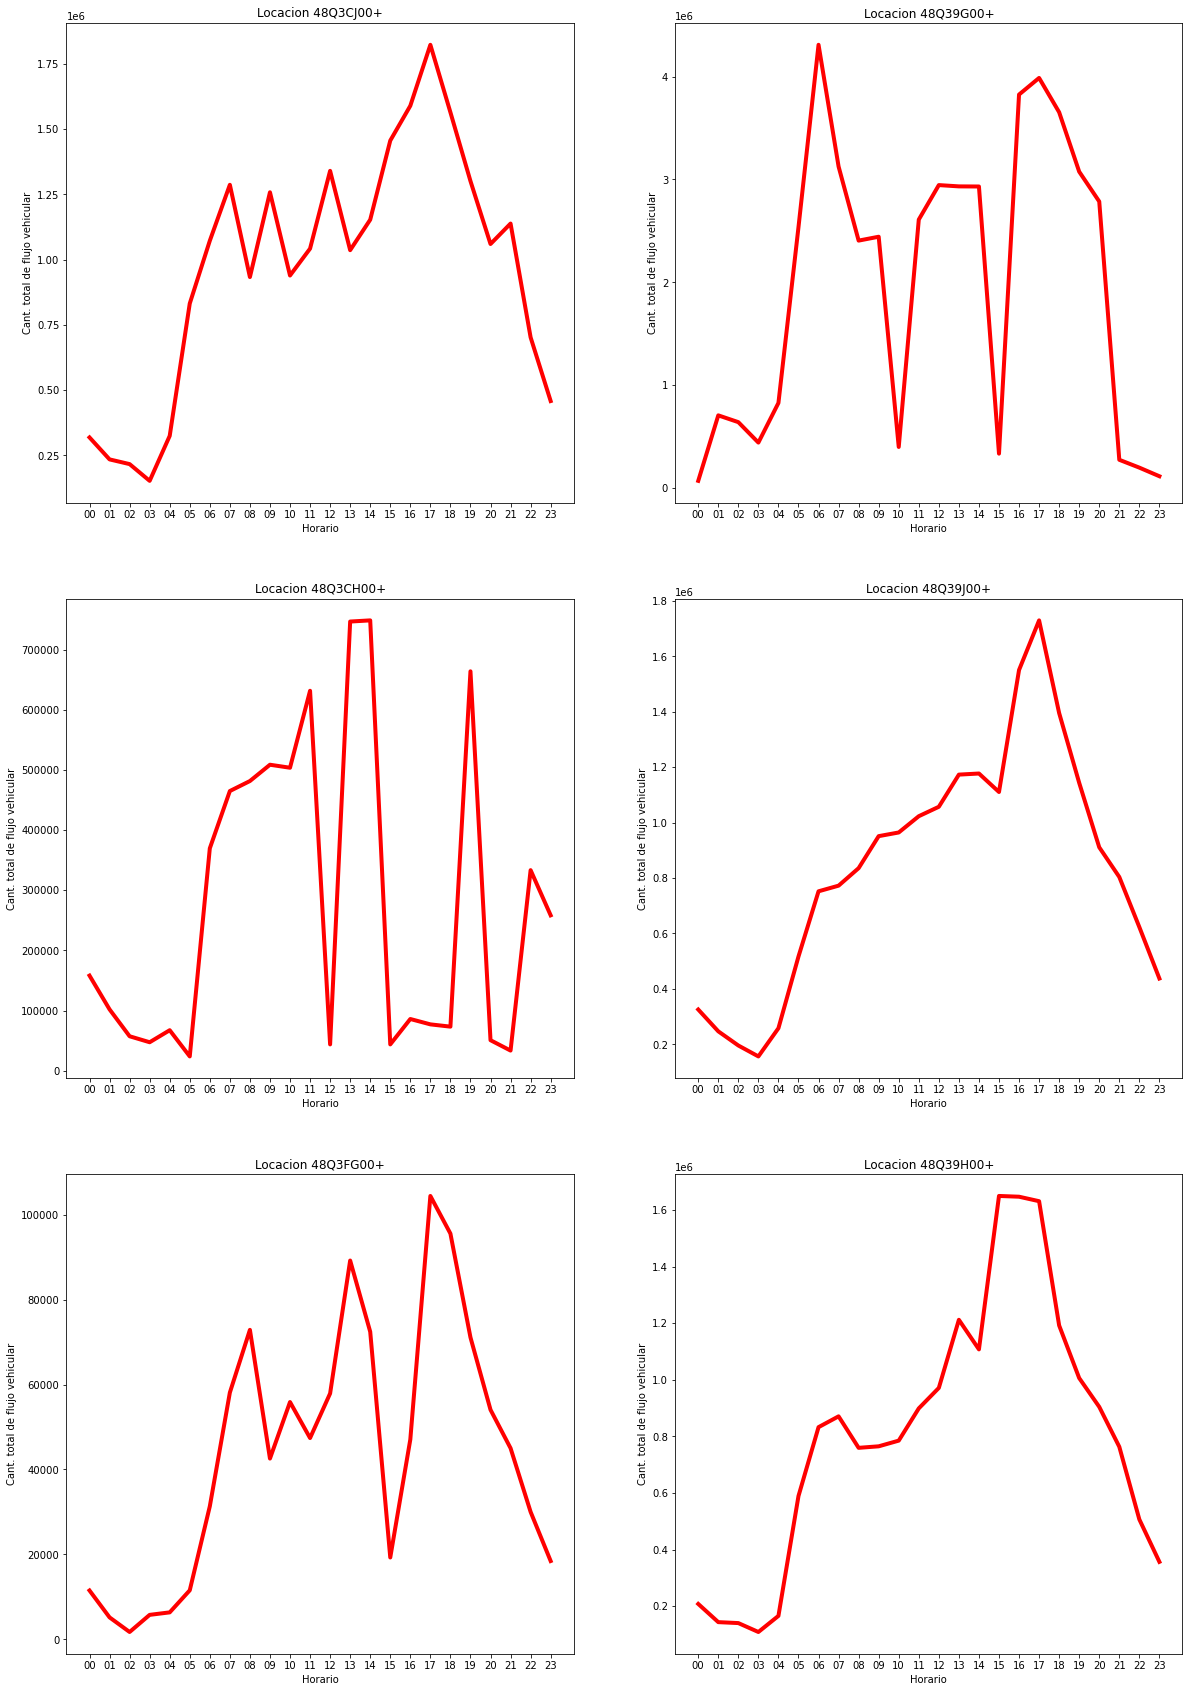

In [20]:
# En último lugar, buscaremos encontrar los horarios "picos", es decir, los mas transitados.
fig, ax = plt.subplots(figsize=(20,30),
                       nrows=3,
                       ncols=2)
columns=2

for indx,var in enumerate(times):
    i=indx//columns
    j=indx%columns
    ax[i, j].plot(indice,
                  var,
                  linewidth=4,
                  color='red')
    
for indx,var in enumerate(locaciones):
    i=indx//columns
    j=indx%columns
    ax[i, j].set_title("Locacion {}".format(var))
    ax[i, j].set_xlabel("Horario")
    ax[i, j].set_ylabel("Cant. total de flujo vehicular")